# **Exemplo Gorjeta - Lógica Fuzzy**

Esse exemplo foi adaptado de [pythonhosted.org](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)

O problema consiste em desenvolver um sistema que automaticamente decide qual deve ser a gorjeta dada dependendo da qualidade da comida e do serviço de qualquer restaurante.

Como **entrada (antecedentes)** do problema temos:

* **Qualidade da Comida**, onde o universo corresponde ao intervalo de [0,10] e o conjunto difuso: **péssima**, **comível**, **deliciosa**.

* **Qualidade do Serviço**, onde o universo também corresponde ao intervalo de [0,10] e o conjunto difuso: **ruim**, **aceitável**, **excelente**.


Como **saída (consequentes)** do problema temos:

* **Gorjeta**, onde o universo corresponde ao intervalo [0,10], e o conjunto difuso: **baixa**, **média**, **alta**.

### **Regras de Decisão**

> **SE** o serviço foi excelente **OU** a comida estava deliciosa **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média

> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa



## Instalação de pacotes necessários

In [5]:
# Normalmente necessário instalar o pacote skfuzzy
#!conda install networkx==3.0
!conda install -y -c conda-forge scikit-fuzzy


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.2
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scikit-fuzzy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-fuzzy-0.4.2         |             py_1         710 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         710 KB

The following NEW packages will be INSTALLED:

  scikit-fuzzy       conda-forge/noarch::scikit-fuzzy-0.4.2-py_1 



                                                                                
Preparing transaction: done
Ver

## Início da implementação

In [6]:
#!conda install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis do problema
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 11, 1), 'gorjeta')

## ATIVIDADE 03 - Altere o método de defuzzificação para os mesmos valores de entrada, analise os resultados e disserte sobre os mesmos.
# Possibilita a escolha do metodo de defuzzificação (exemplo: centroide, bisector, mom, som, lom)
# gorjeta.defuzzify_method = 'centroid'

# Cria automaticamente o mapeamento entre valores nítidos e difusos
# usando uma função de pertinência padrão (triângulo)
comida.automf(names=['péssima', 'comível', 'deliciosa'])

## ATIVIDADE 01 - Crie a Função de pertinência para COMIDA.

# Funções de pertinência
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.trimf(servico.universe, [2,5,8])
servico['excelente'] = fuzz.trimf(servico.universe, [5,10,10])

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 4])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 4,5, 10])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [5, 10, 10])

### Visualizando graficamente as funções de partinência

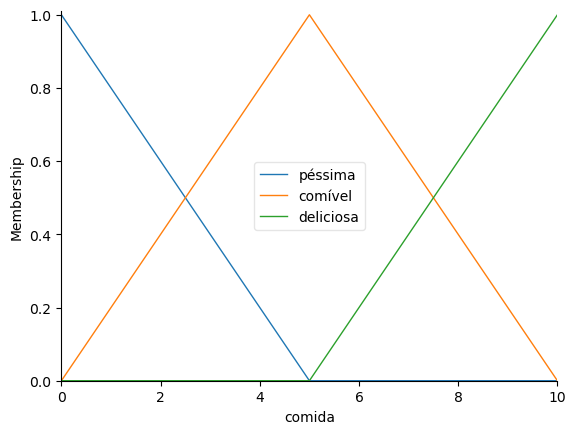

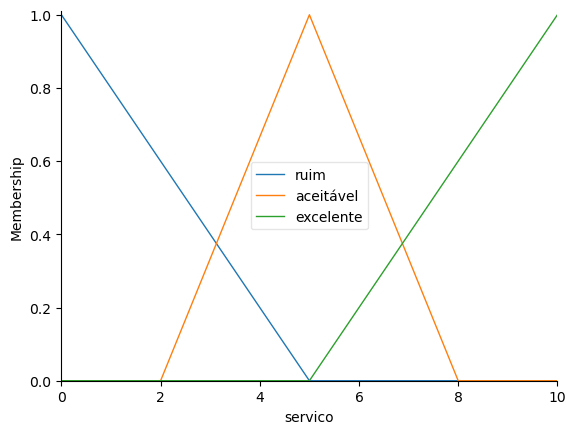

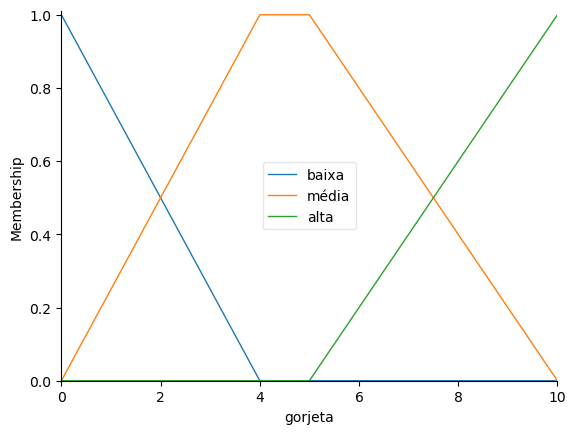

In [8]:
# Visualização das funções de pertinência:

comida.view()
servico.view()
gorjeta.view()

### Definindo as regras de decisão Fuzzy

In [9]:
# Definição das regras de decisão
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

### Criando e simulando um sistema nebuloso

In [11]:
# cria o simulador utilizando as regras de decisão
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)

# ATIVIDADE 02 - Altere os valores de entrada abaixo para testar as 3 regras de decisão, disserte sobre os resultados.

# Entrando com alguns valores para qualidade da comida e do serviço
NOTA_COMIDA = 3.5
NOTA_SERVICO = 7.2

# Fornecido como entrada do simulador
simulador.input['comida'] = NOTA_COMIDA
simulador.input['servico'] = NOTA_SERVICO

# Computa o resultado
simulador.compute()
RESULTADO = simulador.output['gorjeta']
print("Resultado numérico: ", RESULTADO)


Resultado numérico:  5.831443602091579


### Exibindo graficamente o resultado

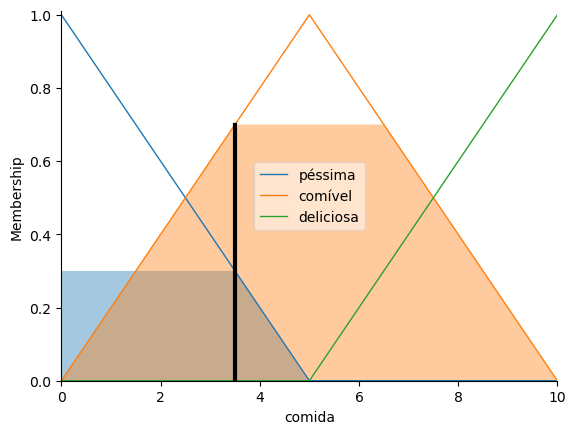

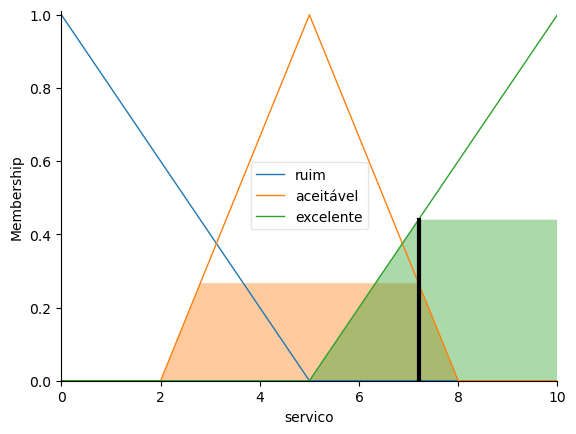

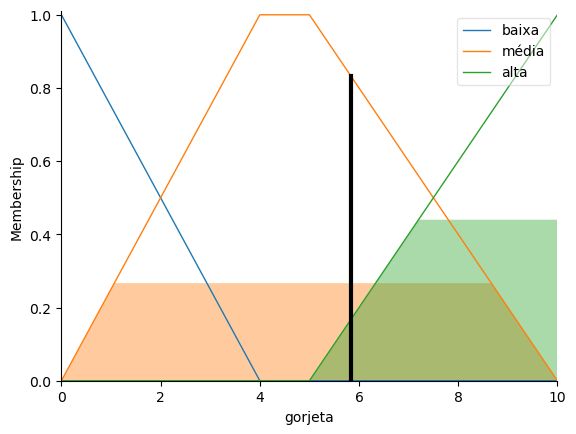

In [12]:
comida.view(sim=simulador)
servico.view(sim=simulador)
gorjeta.view(sim=simulador)


### Imprimindo as pertinências de cada conjunto Fuzzy

In [13]:
## Atividade 04 - Mostre a pertinência dos valores de entrada nos seus respectivos conjuntos fuzzy (comida e serviço)

print("\nPertinência de GORJETA ")
print("Pertinência gorjeta BAIXA: \t" + str(fuzz.interp_membership(gorjeta.universe, gorjeta['baixa'].mf, RESULTADO)))
print("Pertinência gorjeta MÉDIA: \t" + str(fuzz.interp_membership(gorjeta.universe, gorjeta['média'].mf, RESULTADO)))
print("Pertinência gorjeta ALTA: \t" + str(fuzz.interp_membership(gorjeta.universe, gorjeta['alta'].mf, RESULTADO)))


Pertinência de GORJETA 
Pertinência gorjeta BAIXA: 	0.0
Pertinência gorjeta MÉDIA: 	0.8337112795816841
Pertinência gorjeta ALTA: 	0.16628872041831588
